In [1]:
import os
import cv2 
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
frames = np.load("frame_dataset.npy")
frames = np.nan_to_num(frames)

In [3]:
def create_double():
    _pat_samples = []
    _possible_lengths=[ 64 , 72 ,80,88, 96 ,104,112,120,128,144,160,176,192]
    for _length in _possible_lengths:
        for i in range(7,11):
            _patch_1_ = np.linspace(0,1,int((_length)/4)).reshape(1,-1)
            _patch_2_ = np.linspace(1,0,int((_length)/4)).reshape(1,-1)
            _patch_3_ = np.linspace(0,i/10,int((_length)/4)).reshape(1,-1)
            _patch_4_ = np.linspace(i/10,0,int((_length)/4)).reshape(1,-1)
            _pat_ = np.hstack([_patch_1_,_patch_2_,_patch_3_,_patch_4_]).squeeze()
            _pat_samples.append(_pat_.squeeze())
    _pat_samples = np.array(_pat_samples)
    return  _pat_samples

In [4]:
def augment(_pat_samples,_amount,_threshold):
    _cc = _pat_samples.shape[0]
    _pat_samples_=[]
    _pat_indexes_ = []
    _counter = 0
    while _counter<10000:
        _rp_index=random.randint(0,_cc-1)
        _pattern = _pat_samples[_rp_index].reshape(1,-1)

        _rand = random.randint(64,95)
        _rand_frame = frames[random.randint(0,frames.shape[0]-1)].reshape(1,-1)
        _rand_frame = _rand_frame[0,:_rand].reshape(1,-1)
        
        _rand2 = random.randint(1,16)
        _rand2_start = random.randint(6,90-_rand2)
        _rand_frame2 = frames[random.randint(0,frames.shape[0]-1)].reshape(1,-1)
        _rand_frame2 = _rand_frame2[0,_rand2_start:_rand2_start+_rand2]

        if _rand_frame[0,-1]< _threshold:
            continue

        _std = np.std(_rand_frame)
        
        _pattern = _pattern + np.random.normal(0,_std*0.5,size = _pattern.shape)
        _pattern = _rand_frame[0,-1]+_pattern
        _rand_frame2 = _rand_frame2 + (_pattern[0,-1]-_rand_frame2[0])
        _rand_frame2 = _rand_frame2.reshape(1,-1)
        _pat = np.hstack([_rand_frame,_pattern,_rand_frame2])
        _pat = _pat.reshape(_pat.shape+(1,))
        _pat = tf.image.resize(_pat,(1,96)).numpy()
        _pat = _pat.squeeze()
        _pat = (_pat - np.min(_pat))/(np.max(_pat)-np.min(_pat))
        _pat_samples_.append(_pat)
        _index1 = _rand_frame.shape[1]/(_rand_frame.shape[1]+_pattern.shape[1]+_rand_frame2.shape[1])
        _index2 = _rand_frame2.shape[1]/(_rand_frame.shape[1]+_pattern.shape[1]+_rand_frame2.shape[1])
        _pat_indexes_.append([_index1,_index2])
        
        _counter = _counter+1
    return np.array(_pat_samples_),np.array(_pat_indexes_)

In [5]:
double_patterns = create_double()
double_patterns,double_indexes = augment(double_patterns,10000,0.75)

<ipython-input-3-731d46ec1e7f>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _pat_samples = np.array(_pat_samples)


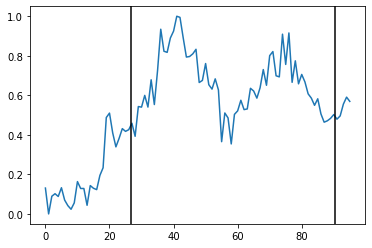

In [12]:
inn =random.randint(0,double_patterns.shape[0]-1)
plt.plot(double_patterns[inn])
plt.axvline(double_indexes[inn,0]*96,color = "black")
plt.axvline((1-double_indexes[inn,1])*96,color="black")

In [7]:
np.min(double_indexes[:,0])

0.23616236162361623

In [13]:
def create_hs():
    _pat_samples = []
    _possible_lengths=[ 64 , 72 ,80,88, 96 ,104,112,120,128,144,160,176,192]
    for _length in _possible_lengths:
        for i in range(3,9):
            _patch_1_ = np.linspace(0,i/10,int((_length)/6)).reshape(1,-1)
            _patch_2_ = np.linspace(i/10,0,int((_length)/6)).reshape(1,-1)
            _patch_3_ = np.linspace(0,1,int((_length)/6)).reshape(1,-1)
            _patch_4_ = np.linspace(1,0,int((_length)/6)).reshape(1,-1)
            _patch_5_ = np.linspace(0,(i-1)/10,int((_length)/6)).reshape(1,-1)
            _patch_6_ = np.linspace((i-1)/10,0,int((_length)/6)).reshape(1,-1)

            _pat_ = np.hstack([_patch_1_,_patch_2_,_patch_3_,_patch_4_,_patch_5_,_patch_6_]).squeeze()
            _pat_samples.append(_pat_)
    return  np.array(_pat_samples)

In [14]:
hs_patterns = create_hs()
hs_patterns,hs_indexes = augment(hs_patterns,10000,0.75)

<ipython-input-13-98891193a753>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return  np.array(_pat_samples)


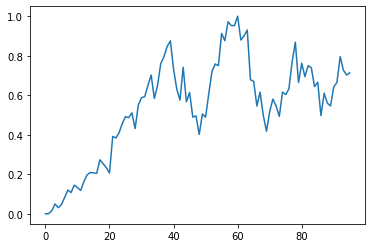

In [15]:
plt.plot(hs_patterns[random.randint(0,hs_patterns.shape[0]-1)])

In [16]:
def create_tri():
    _pat_samples = []
    _possible_lengths=[ 64 , 72 ,80,88, 96 ,104,112,120,128,144,160,176,192]
    for _length in _possible_lengths:
        for j in range(int(_length*0.25),int(_length*0.5),1):
            _patch_1_ = np.linspace(0,1,int((_length)/6)).reshape(1,-1)
            _patch_2_ = np.linspace(1,0.2,int((_length)/6)).reshape(1,-1)
            _patch_3_ = np.linspace(0.2,0.8,int((_length)/6)).reshape(1,-1)
            _patch_4_ = np.linspace(0.8,0.3,int((_length)/6)).reshape(1,-1)
            _patch_5_ = np.linspace(0.3,0.7,int((_length)/6)).reshape(1,-1)
            _patch_6_ = np.linspace(0.7,0.5,int((_length)/6)).reshape(1,-1)
            _pat_ = np.hstack([_patch_1_,_patch_2_,_patch_3_,_patch_4_,_patch_5_,_patch_6_]).squeeze()

            _pat_samples.append(_pat_)
    return np.array(_pat_samples)

In [17]:
tri_patterns = create_tri()
tri_patterns,tri_indexes = augment(tri_patterns,10000,0)

<ipython-input-16-4f88a0db890d>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(_pat_samples)


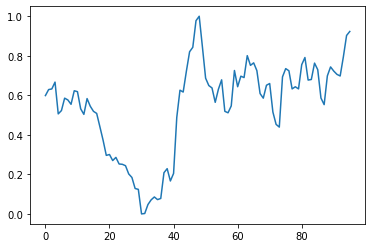

In [18]:
plt.plot(tri_patterns[random.randint(0,tri_patterns.shape[0]-1)])

In [19]:
def create_wedge():
    _pat_samples = []
    _possible_lengths=[ 64 , 72 ,80,88, 96 ,104,112,120,128,144,160,176,192]
    for _length in _possible_lengths:
        _patch_1_ = np.linspace(-0.1,0.85,int((_length)/6)).reshape(1,-1)
        _patch_2_ = np.linspace(0.85,0.25,int((_length)/6)).reshape(1,-1)
        _patch_3_ = np.linspace(0.25,0.95,int((_length)/6)).reshape(1,-1)
        _patch_4_ = np.linspace(0.95,0.5,int((_length)/6)).reshape(1,-1)
        _patch_5_ = np.linspace(0.5,1,int((_length)/6)).reshape(1,-1)
        _patch_6_ = np.linspace(1,0.8,int((_length)/6)).reshape(1,-1)
        _pat_ = np.hstack([_patch_1_,_patch_2_,_patch_3_,_patch_4_,_patch_5_,_patch_6_]).squeeze()
        
        _pat_samples.append(_pat_)
    return np.array(_pat_samples)

In [20]:
wedge_patterns = create_wedge()
wedge_patterns,wedge_indexes = augment(wedge_patterns,10000,0)

<ipython-input-19-f7c94caad0d1>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(_pat_samples)


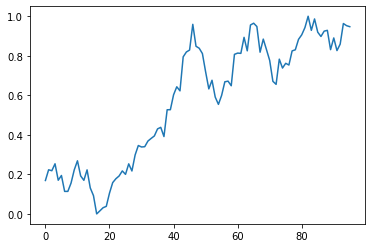

In [21]:
plt.plot(wedge_patterns[random.randint(0,wedge_patterns.shape[0]-1)])

In [22]:
patterns = np.vstack([tri_patterns,double_patterns,hs_patterns,wedge_patterns])

In [23]:
locations = np.vstack([tri_indexes,double_indexes,hs_indexes,wedge_indexes])

In [24]:
np.save("pattern_images.npy",patterns)

In [25]:
np.save("pattern_locations.npy",locations)

In [26]:
np.min(locations[:,0])

0.23529411764705882